### Reference

- https://www.instructables.com/id/Export-data-from-google-spreadsheet-in-required-CS/
- https://medium.com/bhavaniravi/python-pandas-tutorial-92018da85a33
- [Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
- [Parsing input CSV dates](https://riptutorial.com/pandas/example/8458/parsing-date-columns-with-read-csv)
- [Convert column of dataFrame](https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime-dd-mm-yyyy-format)
- [Data Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)
- [Weighted Average Tutorial](https://pbpython.com/weighted-average.html)

### About

Import Weight Data imported from [QS Access iOS App](https://apps.apple.com/us/app/qs-access/id920297614) as CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(pd.__version__)

1.0.1


In [2]:
weights = pd.read_csv("Weight.csv")

In [3]:
weights.head()

,Start,Finish,Weight (lb)
0,11-Dec-2017 07:11,11-Dec-2017 07:11,288.4
1,29-Dec-2017 07:46,29-Dec-2017 07:46,288.4
2,31-Dec-2017 09:24,31-Dec-2017 09:24,286.4
3,03-Jan-2018 06:48,03-Jan-2018 06:48,283.2
4,05-Jan-2018 06:39,05-Jan-2018 06:39,282.0


In [4]:
weights.describe()

,Weight (lb)
count,184.000000
mean,282.369022
std,5.063160
min,271.400000
25%,279.300000
50%,282.300000
75%,285.250000
max,296.400000


In [5]:
# filter out duplicate date columns
cols = ["Start","Weight (lb)"] 
weights = weights[cols] 

# rename columns
weights.columns = ['Date', 'Weight']

# convert date string to datetime object
weights['Date'] = pd.to_datetime(weights['Date'])

weights

,Date,Weight
0,2017-12-11 07:11:00,288.4
1,2017-12-29 07:46:00,288.4
2,2017-12-31 09:24:00,286.4
3,2018-01-03 06:48:00,283.2
4,2018-01-05 06:39:00,282.0
...,...,...
179,2020-04-25 07:29:00,275.6
180,2020-04-26 07:21:00,275.1
181,2020-04-27 07:13:00,276.2
182,2020-04-28 06:19:00,276.5


In [6]:
# copy first weight to trend column
weights.at[0,'Trend'] = weights['Weight'].iloc[0]

# Calculate the Trend given the smoothing constant c
c = 0.9
for i, row in weights[1:].iterrows():
        res = (1 - c) * (weights['Weight'][i] - weights['Trend'][i - 1])
        res = round(res,1)
        weights.at[i,'Trend'] = res + weights['Trend'][i - 1]

weights

,Date,Weight,Trend
0,2017-12-11 07:11:00,288.4,288.4
1,2017-12-29 07:46:00,288.4,288.4
2,2017-12-31 09:24:00,286.4,288.2
3,2018-01-03 06:48:00,283.2,287.7
4,2018-01-05 06:39:00,282.0,287.1
...,...,...,...
179,2020-04-25 07:29:00,275.6,278.4
180,2020-04-26 07:21:00,275.1,278.1
181,2020-04-27 07:13:00,276.2,277.9
182,2020-04-28 06:19:00,276.5,277.8


In [7]:
# copy put zeros in rate col
weights.at[0,'Lbs_per_day'] = 0

#get daily rates
for i, row in weights[1:].iterrows():
        weights.at[i,'Lbs_per_day'] = weights['Trend'][i] - weights['Trend'][i - 1]

weights

,Date,Weight,Trend,Lbs_per_day
0,2017-12-11 07:11:00,288.4,288.4,0.0
1,2017-12-29 07:46:00,288.4,288.4,0.0
2,2017-12-31 09:24:00,286.4,288.2,-0.2
3,2018-01-03 06:48:00,283.2,287.7,-0.5
4,2018-01-05 06:39:00,282.0,287.1,-0.6
...,...,...,...,...
179,2020-04-25 07:29:00,275.6,278.4,-0.3
180,2020-04-26 07:21:00,275.1,278.1,-0.3
181,2020-04-27 07:13:00,276.2,277.9,-0.2
182,2020-04-28 06:19:00,276.5,277.8,-0.1


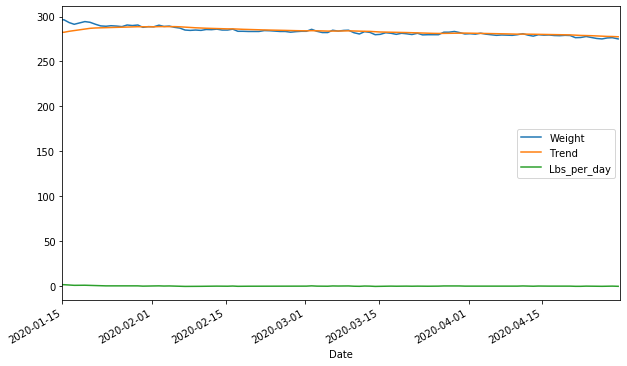

In [8]:
startDate = pd.to_datetime("January 15, 2020")
endDate = pd.Timestamp.now()
domain = (startDate,endDate)
weights.plot.line(figsize=(10,6),x = "Date", legend=True, xlim=domain)

## To Do:

- ~Add column to weights dataFrame of calculated trend D~
- ~plot trend and weight~
- calculate linear fits and project goal target dates
    - possibly multiple models based on a range?
- make an exportable form & workflow so we can easily upload data and run report

https://stackoverflow.com/questions/37337836/linear-regression-with-pandas-time-series

In [9]:
# Get subset of all weights based on date range
startDate = pd.to_datetime("January 15, 2020")
endDate = pd.Timestamp.now()
mask = (weights['Date'] > startDate) & (weights['Date'] <= endDate)

filteredWeights = weights[mask]
filteredWeights

,Date,Weight,Trend,Lbs_per_day
78,2020-01-15 07:35:00,296.4,282.5,1.5
79,2020-01-16 07:03:00,293.3,283.6,1.1
80,2020-01-17 06:01:00,291.4,284.4,0.8
81,2020-01-18 07:46:00,293.0,285.3,0.9
82,2020-01-19 06:36:00,294.4,286.2,0.9
...,...,...,...,...
179,2020-04-25 07:29:00,275.6,278.4,-0.3
180,2020-04-26 07:21:00,275.1,278.1,-0.3
181,2020-04-27 07:13:00,276.2,277.9,-0.2
182,2020-04-28 06:19:00,276.5,277.8,-0.1


In [10]:
y = filteredWeights['Trend'].tolist()
x = range(len(y))
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
goal = 225*np.ones(500)

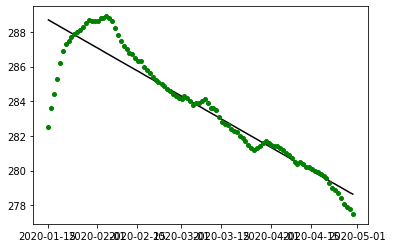

In [11]:
plt.plot(filteredWeights['Date'], fit_fn(x), 'k-')
plt.plot(filteredWeights['Date'], filteredWeights['Trend'], 'go', ms = 4)

In [12]:
dietStartDate = pd.to_datetime("January 15, 2020") 
today = pd.Timestamp.now()
dietLength = (today - dietStartDate).days

i = 28
while fit_fn(i) > 225:
    i += 1
    
fit_fn(i)
print("Day:",i," Value: ",fit_fn(i))

Day: 666  Value:  224.95227800589333


In [13]:
dietStartDate + pd.DateOffset(i)

Timestamp('2021-11-11 00:00:00')

In [14]:
dietStartDate + pd.DateOffset(10)

Timestamp('2020-01-25 00:00:00')

In [21]:
for i in range(400,420):
    print(fit_fn(i))

250.4092626646842
250.31355971483913
250.21785676499405
250.12215381514898
250.0264508653039
249.93074791545882
249.83504496561375
249.73934201576864
249.64363906592357
249.5479361160785
249.4522331662334
249.35653021638834
249.26082726654326
249.16512431669818
249.0694213668531
248.97371841700803
248.87801546716295
248.78231251731788
248.6866095674728
248.5909066176277


In [16]:
type(fit_fn)

numpy.poly1d

In [17]:
print(np.poly1d(fit_fn))

 
-0.0957 x + 288.7
